In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
lang = pd.read_csv('data/Language Identification data.csv')

In [3]:
lang.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [4]:
lang.describe()

,Text,language
count,22000,22000
unique,21859,22
top,haec commentatio automatice praeparata res ast...,Pushto
freq,48,1000


In [5]:
lang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      22000 non-null  object
 1   language  22000 non-null  object
dtypes: object(2)
memory usage: 343.9+ KB


In [6]:
lang.groupby('language').size()

language
Arabic        1000
Chinese       1000
Dutch         1000
English       1000
Estonian      1000
French        1000
Hindi         1000
Indonesian    1000
Japanese      1000
Korean        1000
Latin         1000
Persian       1000
Portugese     1000
Pushto        1000
Romanian      1000
Russian       1000
Spanish       1000
Swedish       1000
Tamil         1000
Thai          1000
Turkish       1000
Urdu          1000
dtype: int64

In [7]:
import string

def text_process(mess):
    first = [char for char in mess if char not in string.punctuation]
    second = ''.join(first)
    return second

lang['Text'] = lang['Text'].apply(text_process)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

In [9]:
cv = CountVectorizer(ngram_range=(1, 3))
X = cv.fit_transform(lang['Text'])
y = lang['language']

#tfidf = TfidfTransformer()
#X = tfidf.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [13]:
pred = clf.predict(X_test)

              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       204
     Chinese       0.95      0.60      0.74       186
       Dutch       1.00      0.98      0.99       207
     English       0.70      1.00      0.82       208
    Estonian       1.00      0.98      0.99       208
      French       0.94      0.99      0.97       175
       Hindi       0.99      0.97      0.98       197
  Indonesian       0.99      0.99      0.99       181
    Japanese       0.76      0.89      0.82       209
      Korean       1.00      0.99      0.99       185
       Latin       1.00      0.91      0.95       210
     Persian       1.00      1.00      1.00       205
   Portugese       1.00      0.97      0.98       206
      Pushto       1.00      0.95      0.98       211
    Romanian       1.00      0.99      0.99       215
     Russian       0.99      0.99      0.99       214
     Spanish       0.99      0.98      0.99       200
     Swedish       0.99    

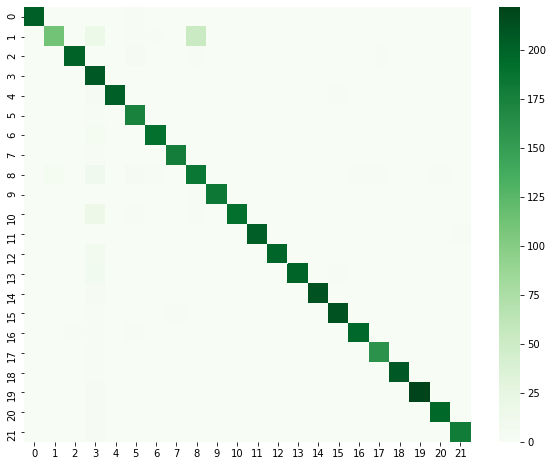

In [14]:
print(classification_report(y_test, pred))
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, pred), cmap="Greens")

In [15]:
def detect(inp):
    return clf.predict(cv.transform(inp))

In [16]:
detect(["This is a classic ratpack"])

array(['English'], dtype='<U10')

In [17]:
detect(["je crois que demain il va pleuvoir"])

array(['French'], dtype='<U10')

In [18]:
detect(["كتابة مفهومة من قبل اغلب برامج"])

array(['Arabic'], dtype='<U10')

In [19]:
detect(["sabes que ya llevo un rato mirándote"])

array(['Spanish'], dtype='<U10')

In [20]:
detect(["कल हमारे लिए बहुत अच्छा दिन है"])

array(['Hindi'], dtype='<U10')

In [21]:
detect(["мы действительно собираемся посетить Москву завтра"])

array(['Russian'], dtype='<U10')

In [22]:
detect(["iyi bir programcıyım, öğretmenlerim sayesinde"])

array(['Turkish'], dtype='<U10')